In [1]:
import sys
import os

import pandas as pd

import ipywidgets as widgets
from IPython.display import display

# add parent directory to path
library_path = os.path.abspath('..')
if library_path not in sys.path:
    sys.path.append(library_path)

from ideal_genom.plots import trumpet_draw

At the end of the next cell, please fill the required values. The notebook could be modified according to the user interest and particular requirements, nevertheless in order to use as it is, the user should have the following specifications in mind. It is expected that all files are tab-separated-values, but the user can change this easily on the corresponding cell.

1. `input_path` is the path to the folder where the necessary files to draw the plot are.
2. `gwas_name` is the name of the file containing the **GWAS** summary statistics.
3. `freq_name` is the name of the file containing minor allele frequency for each SNP.
   
If the **GWAS** file already contains MAF the `freq_name` field can be left empty.

In [2]:
# Create interactive widgets for input
input_path = widgets.Text(
    value='/mnt/0A2AAC152AABFBB7/data/gwasResult/',
    description='Path to project folder:',
    style={'description_width': 'initial'}
)

gwas_name = widgets.Text(
    value='annotated_normalized_combined_R2_0.3.dose_step2_sex_pheno-glm.PHENO1.glm.logistic.hybrid',
    description='Name GWAS summary file:',
    style={'description_width': 'initial'}
)

freq_name = widgets.Text(
    value='ds_results.frq',
    description='Name of file with MAF:',
    style={'description_width': 'initial'}
)

highlight = widgets.Text(
    value='table_lead_SNPS_GWAS_glm_logistic_final_paper',
    description='Name of file with SNPs to highlight:',
    style={'description_width': 'initial'}
)

annotate = widgets.Text(
    value='table_lead_SNPS_GWAS_glm_logistic_final_paper',
    description='Name of file with SNPs to annotate:',
    style={'description_width': 'initial'}
)

# Display the widgets
display(input_path, gwas_name, freq_name, highlight, annotate)

# Function to get the text parameter values
def get_params():
    return input_path.value, gwas_name.value, freq_name.value, highlight.value, annotate.value

Text(value='/mnt/0A2AAC152AABFBB7/data/gwasResult/', description='Path to project folder:', style=TextStyle(de…

Text(value='annotated_normalized_combined_R2_0.3.dose_step2_sex_pheno-glm.PHENO1.glm.logistic.hybrid', descrip…

Text(value='ds_results.frq', description='Name of file with MAF:', style=TextStyle(description_width='initial'…

Text(value='table_lead_SNPS_GWAS_glm_logistic_final_paper', description='Name of file with SNPs to highlight:'…

Text(value='table_lead_SNPS_GWAS_glm_logistic_final_paper', description='Name of file with SNPs to annotate:',…

In [3]:
# Use the parameter values
path_params = get_params()
print(f"Parameter 1: {path_params[0]}")
print(f"Parameter 2: {path_params[1]}")
print(f"Parameter 3: {path_params[2]}")
print(f"Parameter 4: {path_params[3]}")
print(f"Parameter 5: {path_params[4]}")

Parameter 1: /mnt/0A2AAC152AABFBB7/data/gwasResult/
Parameter 2: annotated_normalized_combined_R2_0.3.dose_step2_sex_pheno-glm.PHENO1.glm.logistic.hybrid
Parameter 3: ds_results.frq
Parameter 4: table_lead_SNPS_GWAS_glm_logistic_final_paper
Parameter 5: table_lead_SNPS_GWAS_glm_logistic_final_paper


In [4]:
gwas_cols_touse = widgets.Textarea(
    value="ID, #CHROM, POS, P, BETA",
    description='Columns to use on the trumpet plot (comma-separated):',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)
display(gwas_cols_touse)

def get_gwas_cols():
    return gwas_cols_touse.value

Textarea(value='ID, #CHROM, POS, P, BETA', description='Columns to use on the trumpet plot (comma-separated):'…

In [5]:
cols = get_gwas_cols()

df_gwas = pd.read_csv(
    os.path.join(path_params[0], path_params[1]), sep='\t', usecols=[col.strip() for col in cols.split(',')]
)
df_gwas.head(5)

,#CHROM,POS,ID,BETA,P
0,1,727242,rs61769339,0.032694,0.355696
1,1,727717,rs61769340,-0.020861,0.517232
2,1,730869,rs200188737,0.064970,0.510707
3,1,732369,rs1315713498,-0.039917,0.741994
4,1,740738,rs146067153,0.019702,0.816063


In [6]:
freq_cols_touse = widgets.Textarea(
    value="SNP, MAF",
    description='Columns to use on the trumpet plot (comma-separated):',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)
display(freq_cols_touse)

def get_freq_cols():
    return freq_cols_touse.value

Textarea(value='SNP, MAF', description='Columns to use on the trumpet plot (comma-separated):', layout=Layout(…

In [7]:
if path_params[2] != '':
    df_freq = pd.read_csv(
        os.path.join(path_params[0], path_params[2]), sep='\s+', 
        usecols=[col.strip() for col in get_freq_cols().split(',')]
    )
    df_freq.head(5)
else:
    df_freq = pd.DataFrame()

In [8]:
df_freq.head(5)

,SNP,MAF
0,rs1639700743,0.000582
1,rs1191843977,0.000045
2,chr1:54907:G:A,0.000671
3,rs562522878,0.000492
4,rs1280579627,0.000761


In [9]:
# use this cell to harmonize columns names if necessary
df_freq.columns = ['ID', 'MAF']

In [10]:
rsID = widgets.Text(
    value='SNP',
    description='Column name with the rsID:',
    style={'description_width': 'initial'}
)

display(rsID)

def get_rsID():
    return rsID.value

Text(value='SNP', description='Column name with the rsID:', style=TextStyle(description_width='initial'))

In [11]:
gwas_rsID = get_rsID()

if path_params[3] is not None or path_params[3] != '':
    highlit_path = os.path.join(path_params[0], path_params[3])
    if os.path.exists(highlit_path):
        df_high = pd.read_csv(
            highlit_path, sep='\t'
        )
        to_highlight = df_high[gwas_rsID].to_list()
        print(to_highlight[:10])
        del df_high
    else:
        print('Path to file with SNPs to highlight does not exist')
        to_highlight = []
else:
    print('No file with SNPs to highlight')
    to_highlight = []

['rs3747973', 'rs74990530', 'rs34311866', 'rs356182', 'rs7681440', 'rs1846190', 'rs2517680', 'rs4909940', 'rs528813377', 'rs56328224']


In [12]:
if path_params[4] is not None and path_params[4] != '':
    anno_path = os.path.join(path_params[0], path_params[4])
    if os.path.exists(anno_path):
        df_anno = pd.read_csv(
            anno_path, sep='\t'
        )
        to_annotate = df_anno[gwas_rsID].to_list()
        print(to_annotate[:10])
        del df_anno
    else:
        print('Path to file with SNPs to annotate does not exist')
        to_annotate = []
else:
    print('No file with SNPs to annotate')
    to_annotate = []

['rs3747973', 'rs74990530', 'rs34311866', 'rs356182', 'rs7681440', 'rs1846190', 'rs2517680', 'rs4909940', 'rs528813377', 'rs56328224']


In [13]:
SNP_col = widgets.Text(
    value='ID',
    description='Column with rsID:',
    style={'description_width': 'initial'}
)

CHR_col = widgets.Text(
    value='#CHROM',
    description='Column with chromosome:',
    style={'description_width': 'initial'}
)

POS_col = widgets.Text(
    value='POS',
    description='Column with base-pair position:',
    style={'description_width': 'initial'}
)

P_col = widgets.Text(
    value='P',
    description='Column with p-values:',
    style={'description_width': 'initial'}
)

BETA_col = widgets.Text(
    value='BETA',
    description='Column with BETA (Effect Size):',
    style={'description_width': 'initial'}
)
display(SNP_col, CHR_col, POS_col, P_col, BETA_col)

def get_col_names():
    return SNP_col.value, CHR_col.value, POS_col.value, P_col.value, BETA_col.value

Text(value='ID', description='Column with rsID:', style=TextStyle(description_width='initial'))

Text(value='#CHROM', description='Column with chromosome:', style=TextStyle(description_width='initial'))

Text(value='POS', description='Column with base-pair position:', style=TextStyle(description_width='initial'))

Text(value='P', description='Column with p-values:', style=TextStyle(description_width='initial'))

Text(value='BETA', description='Column with BETA (Effect Size):', style=TextStyle(description_width='initial')…

In [14]:
snp_col, chr_col, pos_col, p_col, beta_col = get_col_names()

2024/11/08 14:14:40  -Using user-provided gtf:/mnt/0A2AAC152AABFBB7/CGE/luxgiant-dstream/GCF_000001405.40_GRCh38.p14_genomic.gtf


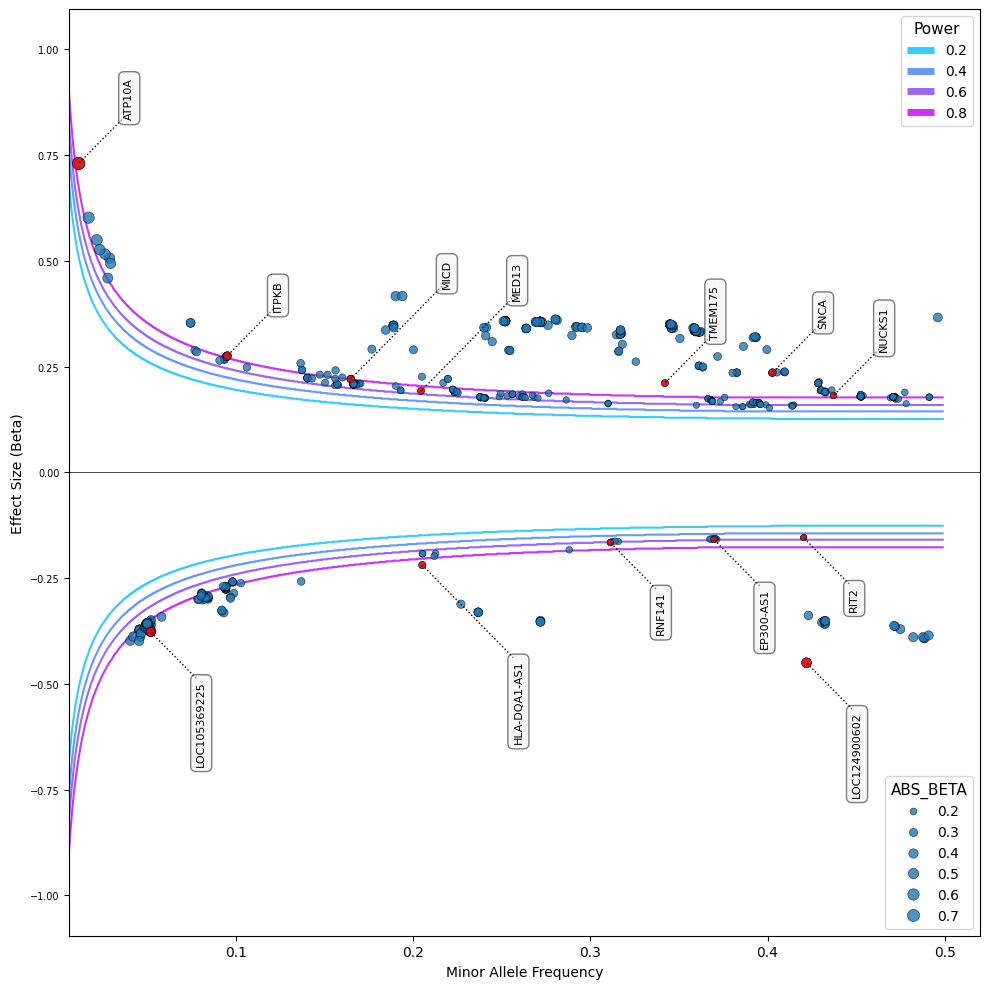

True

<Figure size 640x480 with 0 Axes>

In [15]:
trumpet_draw(
    df_gwas =df_gwas,
    df_freq =df_freq,
    snp_col =snp_col,
    p_col   =p_col,
    beta_col=beta_col,
    chr_col =chr_col,
    pos_col =pos_col,
    maf_col='MAF',
    power_ts=[0.2, 0.4, 0.6, 0.8],
    n_case=4806,
    n_control=6364,
    prevalence=0.05,
    plot_dir=path_params[0],
    to_highlight=to_highlight,
    to_annotate=to_annotate,
    )